# 1b

## Exercise 1

In [2]:
import numpy as np

in_dir = "data/"
txt_name = "irisdata.txt"

iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


The matrix dimensions are correct.

## Exercise 2

In [ ]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

## Exercise 3

In [5]:
sum1 = 0
for i in range(n_obs):
    sum1 += sep_l[i] * sep_w[i]
cov_seplw = sum1/(n_obs - 1)

sum2 = 0
for i in range(n_obs):
    sum2 += sep_l[i] * pet_l[i]
cov_sepl_petl = sum2/(n_obs - 1)

print(cov_seplw, cov_sepl_petl)

17.610000000000007 7.48448979591837


Sepal length shows stronger covariance with sepal width (≈17.61) than with petal length (≈7.48). However, since covariance is scale-dependent, the magnitude alone is not enough to interpret the strength of the relationship. To compare fairly, we should compute correlation.

## Exercise 4

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

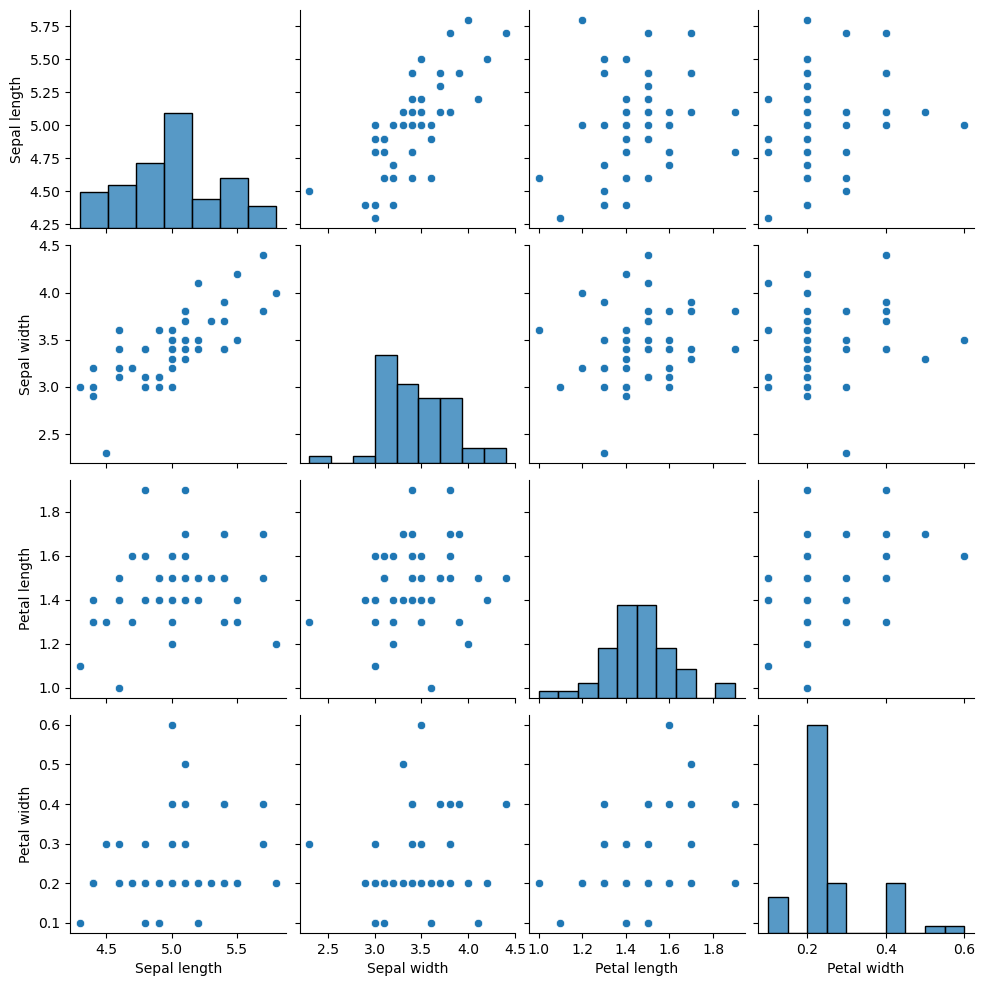

In [9]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

Sepal width and length seems to have somewhat of a linear relationship, while all others seems to be quite random.

## Exercise 5

In [11]:
mn = np.mean(x, axis=0)
data = x - mn

CX = (data.T @ data)/(n_obs - 1)
CX

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

In [ ]:
np.cov(data, )

array([[ 0.00637967, -0.00850367, -0.00742033, ..., -0.01262033,
         0.012963  , -0.00010367],
       [-0.00850367,  0.03244633,  0.00769633, ...,  0.009163  ,
        -0.01942033,  0.007513  ],
       [-0.00742033,  0.00769633,  0.012113  , ...,  0.016913  ,
        -0.01750367, -0.00057033],
       ...,
       [-0.01262033,  0.009163  ,  0.016913  , ...,  0.02837967,
        -0.026037  , -0.002437  ],
       [ 0.012963  , -0.01942033, -0.01750367, ..., -0.026037  ,
         0.028713  , -0.00102033],
       [-0.00010367,  0.007513  , -0.00057033, ..., -0.002437  ,
        -0.00102033,  0.00257967]], shape=(50, 50))

## Exercise 6

In [13]:
values, vectors = np.linalg.eig(CX) # Here c_x is your covariance matrix.

## Exercise 7

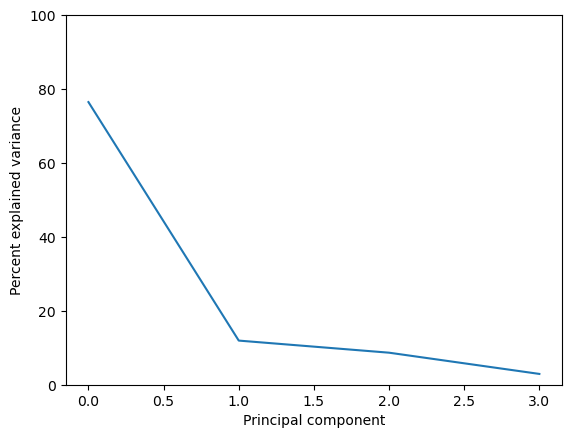

In [14]:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

## Exercise 8

In [18]:
from sklearn import decomposition
pc_proj = vectors.T.dot(data.T)

## Exercise 9

In [23]:
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(x)
display(vectors_pca)

array([[ 0.6690784 ,  0.73414783,  0.0965439 ,  0.06356359],
       [-0.59788401,  0.62067342, -0.49005559, -0.13093791],
       [-0.43996277,  0.27460747,  0.8324495 ,  0.19506751],
       [-0.03607712, -0.01955027, -0.23990129,  0.96992969]])

Compare to previous pca vectors

In [24]:
display(vectors.T)

array([[ 0.6690784 ,  0.73414783,  0.0965439 ,  0.06356359],
       [ 0.59788401, -0.62067342,  0.49005559,  0.13093791],
       [ 0.43996277, -0.27460747, -0.8324495 , -0.19506751],
       [-0.03607712, -0.01955027, -0.23990129,  0.96992969]])

It seems the principal components have been transposed. Some of them also has opposite signs, but this shouldn't mean anything, just that the method was different.

In [25]:
display(CX)
display(np.cov(data, rowvar=False))

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

The covariance matrices are identical.